# Pregunta 5
### ¿Existe un grupo étnico predominante entre los agresores de violencia intrafamiliar? 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';', low_memory=False)

In [15]:
df['EVENTO_REAL'] = df.apply(
    lambda row: 'Violencia' if pd.notna(row['VIC_EDAD']) 
    else 'Divorcio',
    axis=1
)


In [18]:
# Limpia data
df['AGR_GRUPET'] = df['AGR_GRUPET'].astype(str).str.strip()

# Reemplazar valores numéricos por "No indica"
df['AGR_GRUPET'] = df['AGR_GRUPET'].replace(
    r'^\d+(\.0)?$', 
    'No indica',
    regex=True
)

# Mapear categorías equivalentes
map_etnia = {
    'Ladinos(as)': 'Ladino',
    'Maya': 'Maya',
    'Mayas': 'Maya',
    'Garifuna': 'Garífuna',
    'Garifunas': 'Garífuna',
    'Xinca': 'Xinca',
    'Xinkas': 'Xinca',
    'Xinka': 'Xinca',
    'Otro': 'Otro',
    'Otros': 'Otro',
    'Ignorado': 'No indica',
    'No indica': 'No indica'
}

df['AGR_GRUPET'] = df['AGR_GRUPET'].replace(map_etnia)

# 2AHORA FILTRAR SOLO VIOLENCIA
violencia_df = df[df['EVENTO_REAL'] == 'Violencia']

# ELIMINAR NA SI QUIERES
violencia_df = violencia_df[violencia_df['AGR_GRUPET'].notna()]

# VERIFICAR RESULTADO FINAL
violencia_df['AGR_GRUPET'].value_counts()


AGR_GRUPET
No indica    133110
Ladino       121695
Maya          69245
Otro           1244
Xinca           442
Garífuna        369
Name: count, dtype: int64

In [19]:
#Tabla de frecuencias
tabla_etnia_agresor = violencia_df['AGR_GRUPET'].value_counts()

tabla_etnia_agresor = tabla_etnia_agresor.reset_index()

tabla_etnia_agresor.columns = ['Grupo_Etnico', 'Frecuencia']

tabla_etnia_agresor['Frecuencia'] = pd.to_numeric(
    tabla_etnia_agresor['Frecuencia'],
    errors='coerce'
)

tabla_etnia_agresor['Frecuencia (%)'] = (
    tabla_etnia_agresor['Frecuencia'] /
    tabla_etnia_agresor['Frecuencia'].sum() * 100
).round(2)

tabla_etnia_agresor




,Grupo_Etnico,Frecuencia,Frecuencia (%)
0,No indica,133110,40.82
1,Ladino,121695,37.32
2,Maya,69245,21.23
3,Otro,1244,0.38
4,Xinca,442,0.14
5,Garífuna,369,0.11


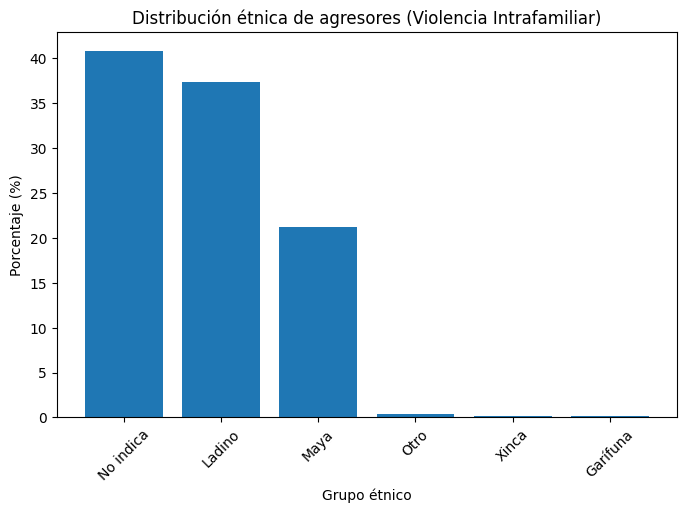

In [20]:
plt.figure(figsize=(8,5))
plt.bar(tabla_etnia_agresor['Grupo_Etnico'],
        tabla_etnia_agresor['Frecuencia (%)'])

plt.title("Distribución étnica de agresores (Violencia Intrafamiliar)")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Grupo étnico")
plt.xticks(rotation=45)
plt.show()
